/home/atoffano/miniconda3/envs/pyg/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


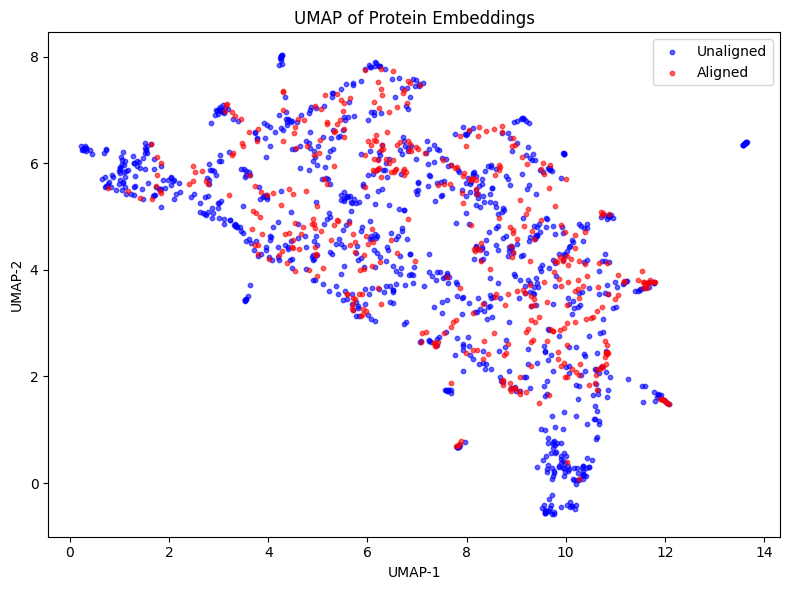

In [1]:
import pandas as pd
import umap

import matplotlib.pyplot as plt

# Load protein sets for selection
bpo = pd.read_csv('/home/atoffano/PFP_baselines/D1_test_annotations/D1_BPO_test.tsv', sep='\t')['target_ID']
cco = pd.read_csv('/home/atoffano/PFP_baselines/D1_test_annotations/D1_CCO_test.tsv', sep='\t')['target_ID']
mfo = pd.read_csv('/home/atoffano/PFP_baselines/D1_test_annotations/D1_MFO_test.tsv', sep='\t')['target_ID']
selected_proteins = set(bpo).union(set(cco)).union(set(mfo))

# Load unaligned protein sets for coloring
unaligned_bpo = set(pd.read_csv('/home/atoffano/PFP_baselines/2003_12/baselines_D1_2003_12_BPO/unaligned_proteins_D1_2003_12_BPO.txt', header=None)[0])
unaligned_cco = set(pd.read_csv('/home/atoffano/PFP_baselines/2003_12/baselines_D1_2003_12_CCO/unaligned_proteins_D1_2003_12_CCO.txt', header=None)[0])
unaligned_mfo = set(pd.read_csv('/home/atoffano/PFP_baselines/2003_12/baselines_D1_2003_12_MFO/unaligned_proteins_D1_2003_12_MFO.txt', header=None)[0])
unaligned_proteins = unaligned_bpo.union(unaligned_cco).union(unaligned_mfo)

# Load embeddings and filter
emb_df = pd.read_csv('/home/atoffano/these-antoine/data/BeProf/beprof_esmc_600M_emb.csv')
emb_df = emb_df[emb_df['protein'].isin(selected_proteins)].reset_index(drop=True)

# Assign label for coloring
emb_df['Alignment'] = emb_df['protein'].apply(lambda x: 'Unaligned' if x in unaligned_proteins else 'Aligned')
colors = {'Unaligned': 'blue', 'Aligned': 'red'}

# UMAP embedding
embedding_cols = [col for col in emb_df.columns if col not in ['protein', 'Alignment']]
umap_emb = umap.UMAP(random_state=42).fit_transform(emb_df[embedding_cols])

# Plot
plt.figure(figsize=(8, 6))
for label, color in colors.items():
    idx = emb_df['Alignment'] == label
    plt.scatter(umap_emb[idx, 0], umap_emb[idx, 1], c=color, label=label, alpha=0.6, s=10)
plt.xlabel('UMAP-1')
plt.ylabel('UMAP-2')
plt.legend()
plt.title('UMAP of Protein Embeddings')
plt.tight_layout()
plt.show()

/home/atoffano/miniconda3/envs/pyg/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


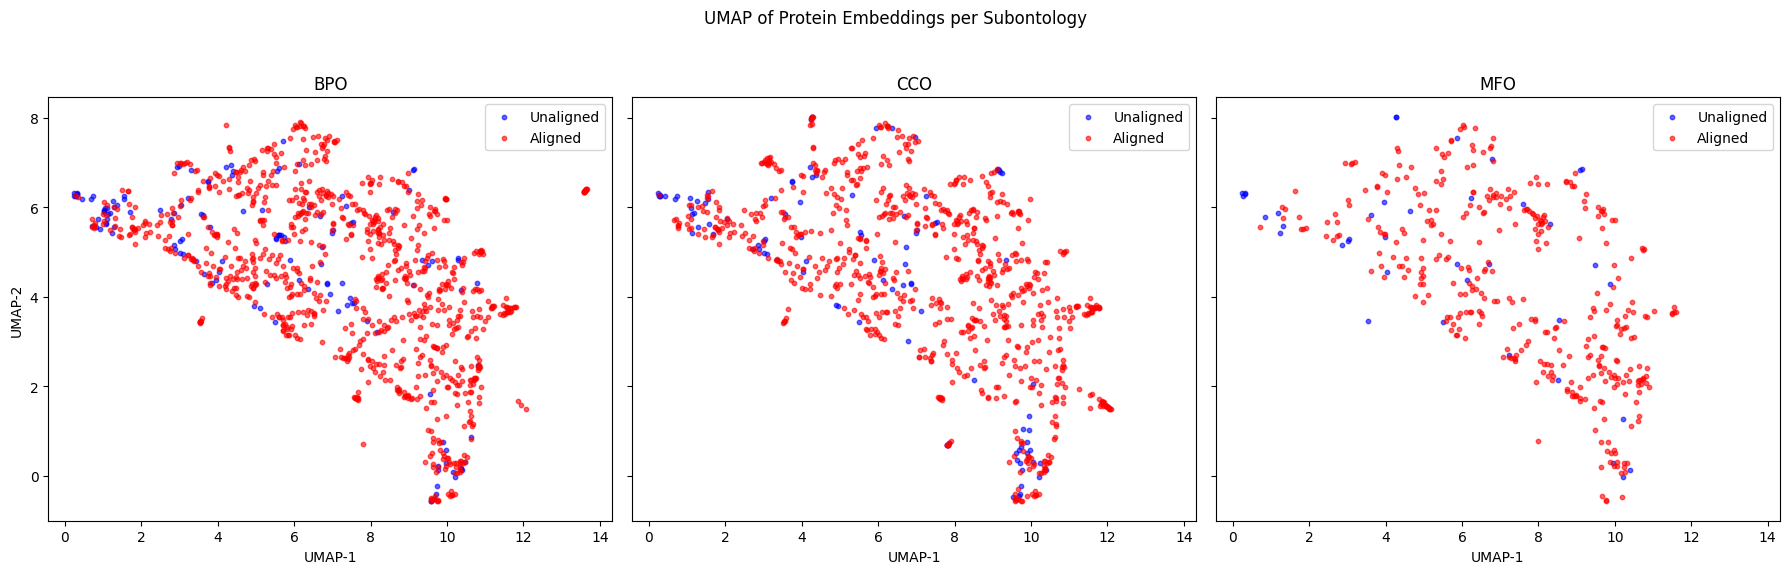

In [19]:
import pandas as pd
import umap
import matplotlib.pyplot as plt

# Load protein sets for selection
bpo = pd.read_csv('/home/atoffano/PFP_baselines/D1_test_annotations/D1_BPO_test.tsv', sep='\t')['target_ID']
cco = pd.read_csv('/home/atoffano/PFP_baselines/D1_test_annotations/D1_CCO_test.tsv', sep='\t')['target_ID']
mfo = pd.read_csv('/home/atoffano/PFP_baselines/D1_test_annotations/D1_MFO_test.tsv', sep='\t')['target_ID']
subont_sets = {'BPO': set(bpo), 'CCO': set(cco), 'MFO': set(mfo)}

# Load unaligned protein sets for coloring
unaligned_bpo = set(pd.read_csv('/home/atoffano/PFP_baselines/2020_01/baselines_D1_2020_01_BPO/unaligned_proteins_D1_2020_01_BPO.txt', header=None)[0])
unaligned_cco = set(pd.read_csv('/home/atoffano/PFP_baselines/2020_01/baselines_D1_2020_01_CCO/unaligned_proteins_D1_2020_01_CCO.txt', header=None)[0])
unaligned_mfo = set(pd.read_csv('/home/atoffano/PFP_baselines/2020_01/baselines_D1_2020_01_MFO/unaligned_proteins_D1_2020_01_MFO.txt', header=None)[0])
unaligned_sets = {'BPO': unaligned_bpo, 'CCO': unaligned_cco, 'MFO': unaligned_mfo}

# Load embeddings and filter to all proteins in any subontology
emb_df = pd.read_csv('/home/atoffano/these-antoine/data/BeProf/beprof_esmc_600M_emb.csv')
all_selected_proteins = set(bpo).union(set(cco)).union(set(mfo))
emb_df = emb_df[emb_df['protein'].isin(all_selected_proteins)].reset_index(drop=True)

# UMAP embedding on all selected proteins
embedding_cols = [col for col in emb_df.columns if col != 'protein']
umap_emb = umap.UMAP(random_state=42).fit_transform(emb_df[embedding_cols])

# Prepare subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharex=True, sharey=True)
colors = {'Unaligned': 'blue', 'Aligned': 'red'}

for i, subont in enumerate(['BPO', 'CCO', 'MFO']):
    selected_proteins = subont_sets[subont]
    unaligned_proteins = unaligned_sets[subont]
    # Mask for proteins in this subontology
    mask = emb_df['protein'].isin(selected_proteins)
    # Assign alignment label for this subontology
    alignment = emb_df['protein'].apply(lambda x: 'Unaligned' if x in unaligned_proteins else 'Aligned')
    ax = axes[i]
    for label, color in colors.items():
        idx = (alignment == label) & mask
        ax.scatter(umap_emb[idx, 0], umap_emb[idx, 1], c=color, label=label, alpha=0.6, s=10)
    ax.set_title(f'{subont}')
    ax.set_xlabel('UMAP-1')
    if i == 0:
        ax.set_ylabel('UMAP-2')
    ax.legend()

plt.suptitle('UMAP of Protein Embeddings per Subontology')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

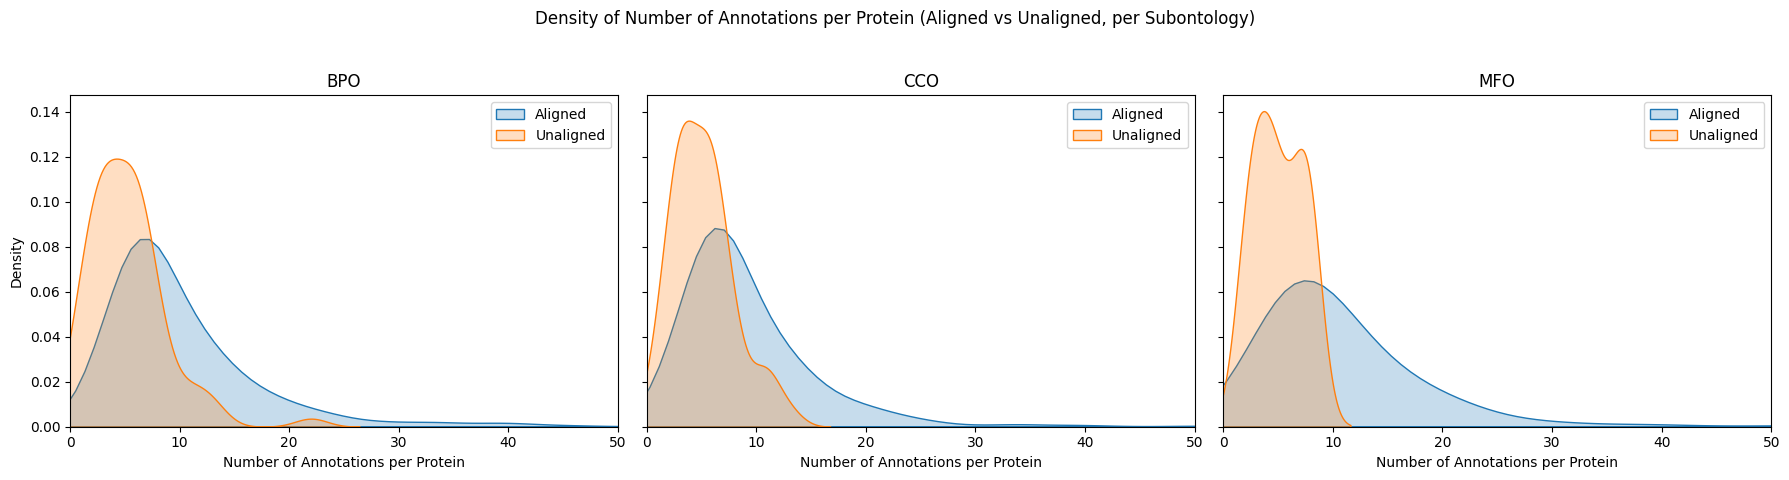

In [56]:
# ...existing code...
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# Load annotation file
anno_file = "/home/atoffano/PFP_baselines/2024_01/swissprot_2024_01_annotations.tsv"
df = pd.read_csv(anno_file, sep='\t')

# Prepare sets for each subontology
subont_dict = {
    'BPO': set(bpo),
    'CCO': set(cco),
    'MFO': set(mfo)
}
unaligned_dict = {
    'BPO': unaligned_bpo,
    'CCO': unaligned_cco,
    'MFO': unaligned_mfo
}

# Count number of annotations per protein (count GO terms, separated by ';')
def count_terms(term_str):
    if pd.isna(term_str):
        return 0
    return len([t for t in str(term_str).split(';') if t.strip()])

fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)
for i, subont in enumerate(['BPO', 'CCO', 'MFO']):
    proteins = subont_dict[subont]
    unaligned_set = unaligned_dict[subont]
    aligned_set = proteins - unaligned_set

    df_unaligned = df[df['EntryID'].isin(unaligned_set)].copy()
    df_aligned = df[df['EntryID'].isin(aligned_set)].copy()
    df_unaligned['n_terms'] = df_unaligned['term'].apply(count_terms)
    df_aligned['n_terms'] = df_aligned['term'].apply(count_terms)

    ax = axes[i]
    sns.kdeplot(df_aligned['n_terms'], label='Aligned', fill=True, common_norm=False, ax=ax)
    sns.kdeplot(df_unaligned['n_terms'], label='Unaligned', fill=True, common_norm=False, ax=ax)
    ax.set_title(subont)
    ax.set_xlabel('Number of Annotations per Protein')
    if i == 0:
        ax.set_ylabel('Density')
    ax.set_xlim(0, 50)
    ax.legend()

plt.suptitle('Density of Number of Annotations per Protein (Aligned vs Unaligned, per Subontology)')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load annotation file
anno_file = "/home/atoffano/PFP_baselines/2024_01/swissprot_2024_01_annotations.tsv"
df = pd.read_csv(anno_file, sep='\t')

# Extract species from Entry Name
df['Species'] = df['EntryID'].apply(lambda x: x.split('_')[1] if isinstance(x, str) and '_' in x else 'Unknown')

# All entries per species in the DB
species_db_counts = df['Species'].value_counts().sort_index()

# All unaligned proteins (union of all subontologies)
all_unaligned = unaligned_bpo.union(unaligned_cco).union(unaligned_mfo)

# Get species for unaligned proteins
unaligned_df = df[df['EntryID'].isin(all_unaligned)].copy()
unaligned_species_counts = unaligned_df['Species'].value_counts().sort_index()

# Align indices for plotting
all_species = sorted(set(species_db_counts.index).union(set(unaligned_species_counts.index)))
db_counts = [species_db_counts.get(species, 0) for species in all_species]
unaligned_counts = [unaligned_species_counts.get(species, 0) for species in all_species]

# Plot
plt.figure(figsize=(14, 6))
bar_width = 0.4
x = range(len(all_species))
plt.bar(x, db_counts, width=bar_width, label='All DB Entries')
plt.bar([i + bar_width for i in x], unaligned_counts, width=bar_width, label='Unaligned Proteins')
plt.xticks([i + bar_width / 2 for i in x], all_species, rotation=90)
plt.xlabel('Species')
plt.ylabel('Number of Entries')
plt.title('Species Distribution: All DB Entries vs Unaligned Proteins')
plt.legend()
plt.tight_layout()
plt.show()

/home/atoffano/miniconda3/envs/pyg/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


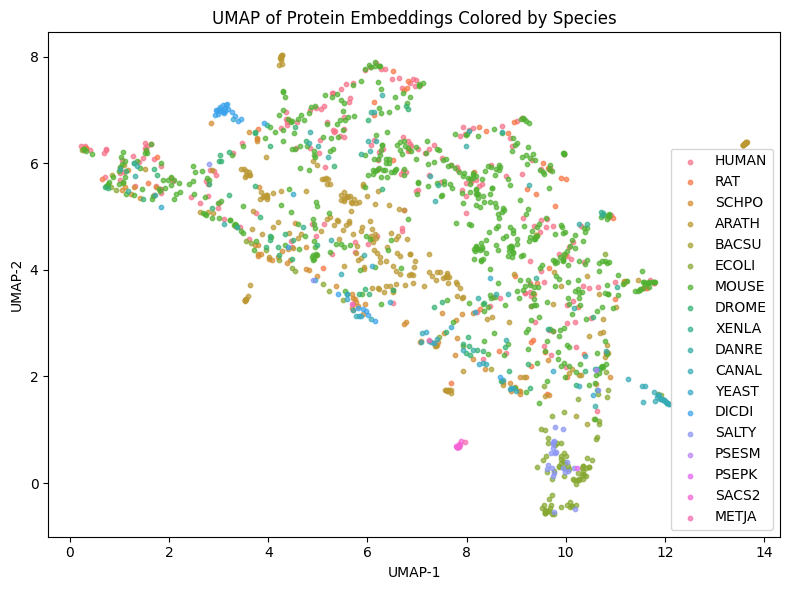

In [ ]:
import pandas as pd
import umap
import seaborn as sns
import matplotlib.pyplot as plt

# Load protein sets for selection
bpo = pd.read_csv('/home/atoffano/PFP_baselines/D1_test_annotations/D1_BPO_test.tsv', sep='\t')['target_ID']
cco = pd.read_csv('/home/atoffano/PFP_baselines/D1_test_annotations/D1_CCO_test.tsv', sep='\t')['target_ID']
mfo = pd.read_csv('/home/atoffano/PFP_baselines/D1_test_annotations/D1_MFO_test.tsv', sep='\t')['target_ID']
selected_proteins = set(bpo).union(set(cco)).union(set(mfo))

# Load embeddings and filter
emb_df = pd.read_csv('/home/atoffano/these-antoine/data/BeProf/beprof_esmc_600M_emb.csv')
emb_df = emb_df[emb_df['protein'].isin(selected_proteins)].reset_index(drop=True)

# Assign label for coloring
emb_df['Species'] = emb_df['protein'].apply(lambda x: x.split('_')[1] if len(x.split('_')) > 1 else 'Unknown')
unique_species = emb_df['Species'].unique()
num_species = len(unique_species)
colors = sns.color_palette('husl', n_colors=num_species)
species_colors = dict(zip(unique_species, colors))

# UMAP embedding
embedding_cols = [col for col in emb_df.columns if col not in ['protein', 'Species']]
umap_emb = umap.UMAP(random_state=42).fit_transform(emb_df[embedding_cols])

# Plot
plt.figure(figsize=(8, 6))
for species, color in species_colors.items():
    idx = emb_df['Species'] == species
    plt.scatter(umap_emb[idx, 0], umap_emb[idx, 1], c=[color], label=species, alpha=0.7, s=10)
plt.xlabel('UMAP-1')
plt.ylabel('UMAP-2')
plt.legend()
plt.title('UMAP of Protein Embeddings Colored by Species')
plt.tight_layout()
plt.show()

/home/atoffano/miniconda3/envs/pyg/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


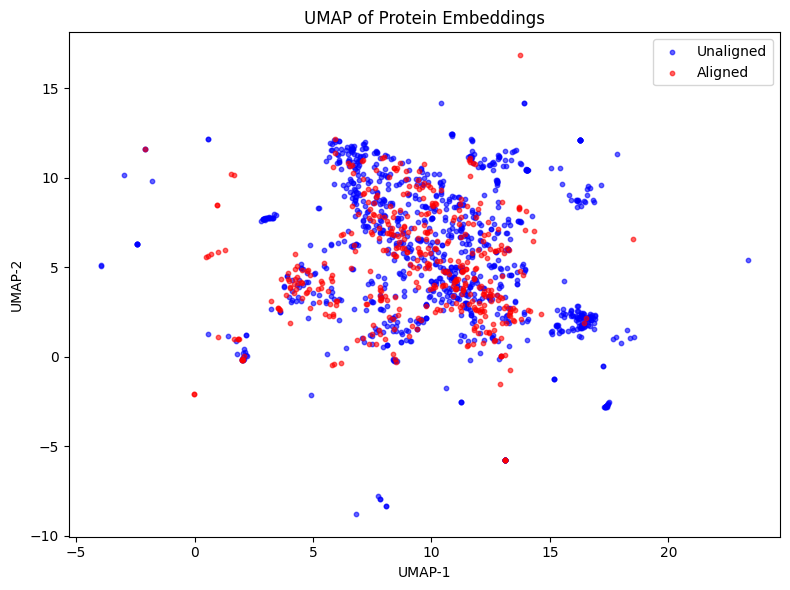

In [19]:
import pandas as pd
import umap

import matplotlib.pyplot as plt

# Load protein sets for selection
bpo = pd.read_csv('/home/atoffano/PFP_baselines/D1_test_annotations/D1_BPO_test.tsv', sep='\t')['target_ID']
cco = pd.read_csv('/home/atoffano/PFP_baselines/D1_test_annotations/D1_CCO_test.tsv', sep='\t')['target_ID']
mfo = pd.read_csv('/home/atoffano/PFP_baselines/D1_test_annotations/D1_MFO_test.tsv', sep='\t')['target_ID']
selected_proteins = set(bpo).union(set(cco)).union(set(mfo))

# Load unaligned protein sets for coloring
unaligned_bpo = set(pd.read_csv('/home/atoffano/PFP_baselines/2003_12/baselines_D1_2003_12_BPO/unaligned_proteins_D1_2003_12_BPO.txt', header=None)[0])
unaligned_cco = set(pd.read_csv('/home/atoffano/PFP_baselines/2003_12/baselines_D1_2003_12_CCO/unaligned_proteins_D1_2003_12_CCO.txt', header=None)[0])
unaligned_mfo = set(pd.read_csv('/home/atoffano/PFP_baselines/2003_12/baselines_D1_2003_12_MFO/unaligned_proteins_D1_2003_12_MFO.txt', header=None)[0])
unaligned_proteins = unaligned_bpo.union(unaligned_cco).union(unaligned_mfo)

# Load embeddings and filter
emb_df = pd.read_csv('/home/atoffano/these-antoine/data/BeProf/beprof_esmc_600M_emb.csv')

# Assign label for coloring
emb_df['Alignment'] = emb_df['protein'].apply(lambda x: 'Unaligned' if x in unaligned_proteins else ('Aligned' if x in selected_proteins else 'Neither'))
colors = {'Unaligned': 'blue', 'Aligned': 'red'}

# UMAP embedding
embedding_cols = [col for col in emb_df.columns if col not in ['protein', 'Alignment']]
umap_emb = umap.UMAP(random_state=42).fit_transform(emb_df[embedding_cols])

# Plot
plt.figure(figsize=(8, 6))
for label, color in colors.items():
    idx = emb_df['Alignment'] == label
    plt.scatter(umap_emb[idx, 0], umap_emb[idx, 1], c=color, label=label, alpha=0.6, s=10)
plt.xlabel('UMAP-1')
plt.ylabel('UMAP-2')
plt.legend()
plt.title('UMAP of Protein Embeddings')
plt.tight_layout()
plt.show()

/home/atoffano/miniconda3/envs/pyg/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


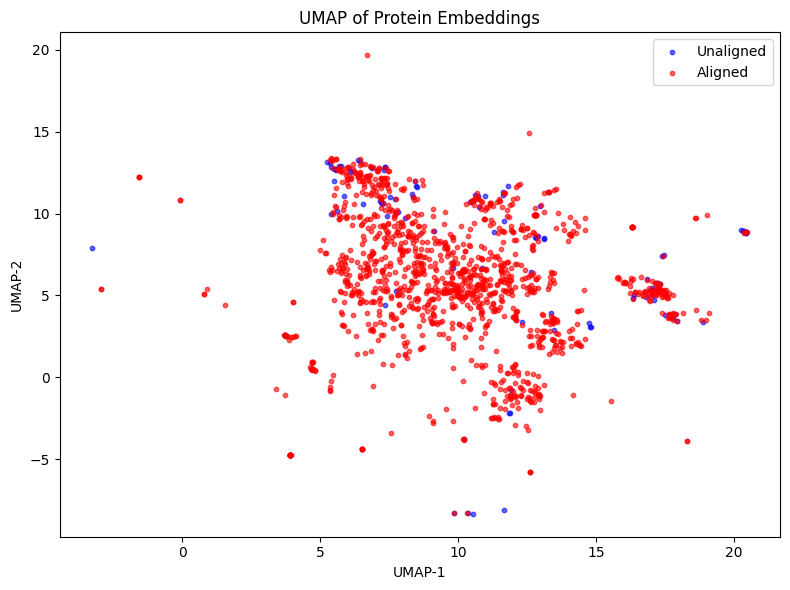

In [22]:
import pandas as pd
import umap

import matplotlib.pyplot as plt

# Load protein sets for selection
bpo = pd.read_csv('/home/atoffano/PFP_baselines/D1_test_annotations/D1_BPO_test.tsv', sep='\t')['target_ID']
cco = pd.read_csv('/home/atoffano/PFP_baselines/D1_test_annotations/D1_CCO_test.tsv', sep='\t')['target_ID']
mfo = pd.read_csv('/home/atoffano/PFP_baselines/D1_test_annotations/D1_MFO_test.tsv', sep='\t')['target_ID']
selected_proteins = set(bpo).union(set(cco)).union(set(mfo))

# Load unaligned protein sets for coloring
unaligned_bpo = set(pd.read_csv('/home/atoffano/PFP_baselines/2024_01/baselines_D1_2024_01_BPO/unaligned_proteins_D1_2024_01_BPO.txt', header=None)[0])
unaligned_cco = set(pd.read_csv('/home/atoffano/PFP_baselines/2024_01/baselines_D1_2024_01_CCO/unaligned_proteins_D1_2024_01_CCO.txt', header=None)[0])
unaligned_mfo = set(pd.read_csv('/home/atoffano/PFP_baselines/2024_01/baselines_D1_2024_01_MFO/unaligned_proteins_D1_2024_01_MFO.txt', header=None)[0])
unaligned_proteins = unaligned_bpo.union(unaligned_cco).union(unaligned_mfo)

# Load embeddings and filter
emb_df = pd.read_csv('/home/atoffano/these-antoine/data/BeProf/beprof_esmc_600M_emb.csv')

# Assign label for coloring
emb_df['Alignment'] = emb_df['protein'].apply(lambda x: 'Unaligned' if x in unaligned_proteins else ('Aligned' if x in selected_proteins else 'Neither'))
colors = {'Unaligned': 'blue', 'Aligned': 'red'}

# UMAP embedding
embedding_cols = [col for col in emb_df.columns if col not in ['protein', 'Alignment']]
umap_emb = umap.UMAP(random_state=42).fit_transform(emb_df[embedding_cols])

# Plot
plt.figure(figsize=(8, 6))
for label, color in colors.items():
    idx = emb_df['Alignment'] == label
    plt.scatter(umap_emb[idx, 0], umap_emb[idx, 1], c=color, label=label, alpha=0.6, s=10)
plt.xlabel('UMAP-1')
plt.ylabel('UMAP-2')
plt.legend()
plt.title('UMAP of Protein Embeddings')
plt.tight_layout()
plt.show()

/home/atoffano/miniconda3/envs/pyg/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


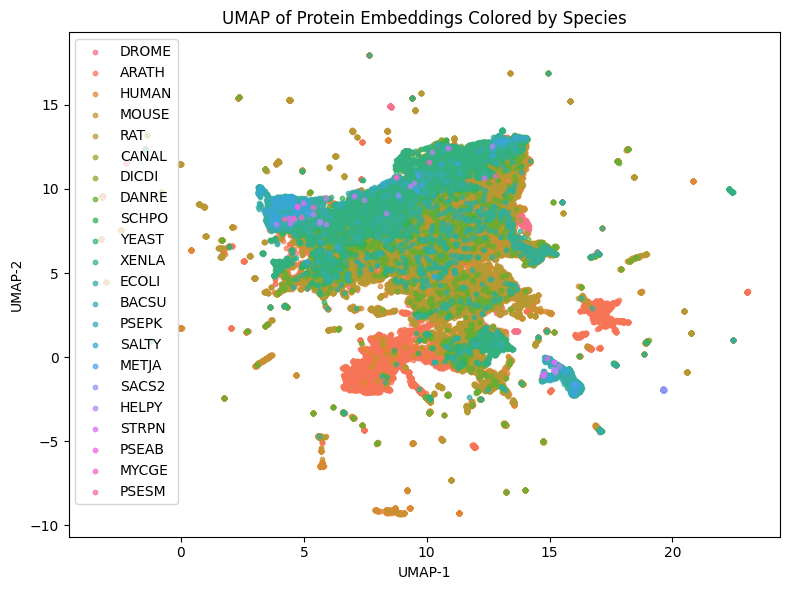

In [25]:
import pandas as pd
import umap

import matplotlib.pyplot as plt

# Load protein sets for selection
bpo = pd.read_csv('/home/atoffano/PFP_baselines/D1_test_annotations/D1_BPO_test.tsv', sep='\t')['target_ID']
cco = pd.read_csv('/home/atoffano/PFP_baselines/D1_test_annotations/D1_CCO_test.tsv', sep='\t')['target_ID']
mfo = pd.read_csv('/home/atoffano/PFP_baselines/D1_test_annotations/D1_MFO_test.tsv', sep='\t')['target_ID']
selected_proteins = set(bpo).union(set(cco)).union(set(mfo))

# Load unaligned protein sets for coloring
unaligned_bpo = set(pd.read_csv('/home/atoffano/PFP_baselines/2024_01/baselines_D1_2024_01_BPO/unaligned_proteins_D1_2024_01_BPO.txt', header=None)[0])
unaligned_cco = set(pd.read_csv('/home/atoffano/PFP_baselines/2024_01/baselines_D1_2024_01_CCO/unaligned_proteins_D1_2024_01_CCO.txt', header=None)[0])
unaligned_mfo = set(pd.read_csv('/home/atoffano/PFP_baselines/2024_01/baselines_D1_2024_01_MFO/unaligned_proteins_D1_2024_01_MFO.txt', header=None)[0])
unaligned_proteins = unaligned_bpo.union(unaligned_cco).union(unaligned_mfo)

# Load embeddings and filter
emb_df = pd.read_csv('/home/atoffano/these-antoine/data/BeProf/beprof_esmc_600M_emb.csv')

# Assign label for coloring
emb_df['Species'] = emb_df['protein'].apply(lambda x: x.split('_')[1] if len(x.split('_')) > 1 else 'Unknown')
unique_species = emb_df['Species'].unique()
num_species = len(unique_species)
colors = sns.color_palette('husl', n_colors=num_species)
species_colors = dict(zip(unique_species, colors))

# UMAP embedding
embedding_cols = [col for col in emb_df.columns if col not in ['protein', 'Species']]
umap_emb = umap.UMAP(random_state=42).fit_transform(emb_df[embedding_cols])

# Plot
plt.figure(figsize=(8, 6))
for species, color in species_colors.items():
    idx = emb_df['Species'] == species
    plt.scatter(umap_emb[idx, 0], umap_emb[idx, 1], c=[color], label=species, alpha=0.7, s=10)
plt.xlabel('UMAP-1')
plt.ylabel('UMAP-2')
plt.legend()
plt.title('UMAP of Protein Embeddings Colored by Species')
plt.tight_layout()
plt.show()

/home/atoffano/miniconda3/envs/pyg/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


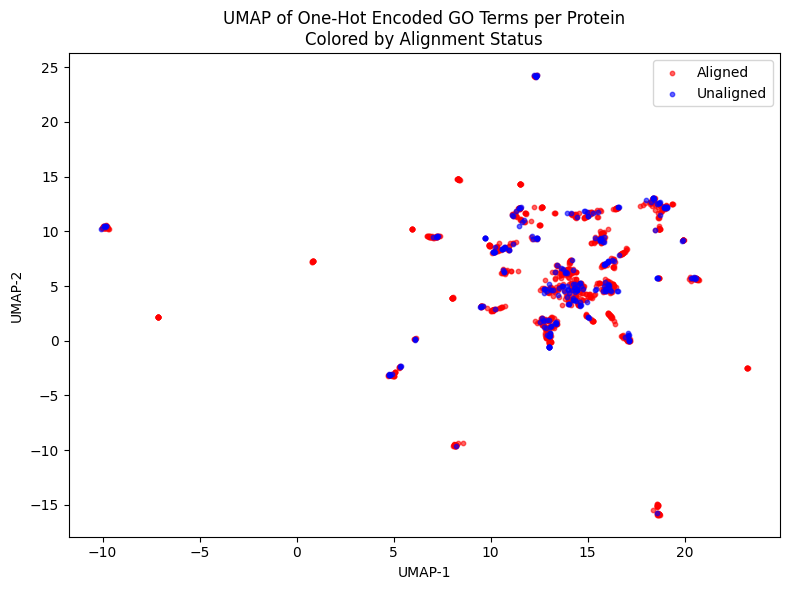

In [18]:
import pandas as pd
import umap
import matplotlib.pyplot as plt

# Load GO term annotation files for each ontology
bpo_terms = pd.read_csv('/home/atoffano/PFP_baselines/D1_test_annotations/D1_BPO_test.tsv', sep='\t')
cco_terms = pd.read_csv('/home/atoffano/PFP_baselines/D1_test_annotations/D1_CCO_test.tsv', sep='\t')
mfo_terms = pd.read_csv('/home/atoffano/PFP_baselines/D1_test_annotations/D1_MFO_test.tsv', sep='\t')

# Concatenate all term mappings
all_terms = pd.concat([bpo_terms, cco_terms, mfo_terms], ignore_index=True)
all_terms = all_terms.rename(columns={'target_ID': 'target_id', 'term_ID': 'term_ID'})

# One-hot encoding: rows=protein, columns=GO terms
onehot = pd.crosstab(all_terms['target_id'], all_terms['term_ID'])

# Prepare aligned/unaligned sets
unaligned_bpo = set(pd.read_csv('/home/atoffano/PFP_baselines/2014_01/baselines_D1_2014_01_BPO/unaligned_proteins_D1_2014_01_BPO.txt', header=None)[0])
unaligned_cco = set(pd.read_csv('/home/atoffano/PFP_baselines/2014_01/baselines_D1_2014_01_CCO/unaligned_proteins_D1_2014_01_CCO.txt', header=None)[0])
unaligned_mfo = set(pd.read_csv('/home/atoffano/PFP_baselines/2014_01/baselines_D1_2014_01_MFO/unaligned_proteins_D1_2014_01_MFO.txt', header=None)[0])
unaligned_proteins = unaligned_bpo.union(unaligned_cco).union(unaligned_mfo)

# Assign alignment status
alignment = onehot.index.to_series().apply(lambda x: 'Unaligned' if x in unaligned_proteins else 'Aligned')

# UMAP embedding
umap_emb = umap.UMAP(random_state=42).fit_transform(onehot)

# Plot with coloring
import numpy as np
colors = np.where(alignment == 'Unaligned', 'blue', 'red')

plt.figure(figsize=(8, 6))
for label, color in [('Aligned', 'red'), ('Unaligned', 'blue')]:
    idx = (alignment == label).values
    plt.scatter(umap_emb[idx, 0], umap_emb[idx, 1], c=color, label=label, alpha=0.6, s=10)
plt.xlabel('UMAP-1')
plt.ylabel('UMAP-2')
plt.title('UMAP of One-Hot Encoded GO Terms per Protein\nColored by Alignment Status')
plt.legend()
plt.tight_layout()
plt.show()

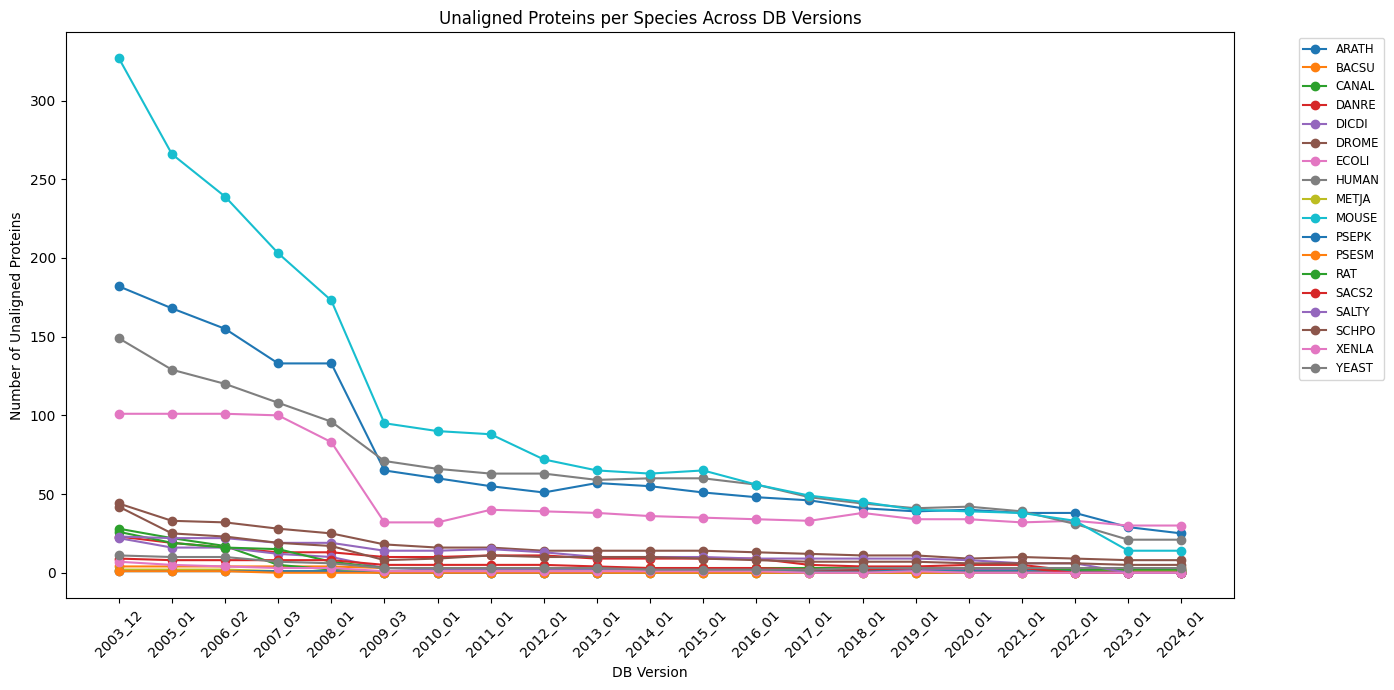

In [21]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict

# List of DB versions (dates)
dates = [
    '2024_01', '2023_01', '2022_01', '2021_01', '2020_01', '2019_01', '2018_01',
    '2017_01', '2016_01', '2015_01', '2014_01', '2013_01', '2012_01', '2011_01',
    '2010_01', '2009_03', '2008_01', '2007_03', '2006_02', '2005_01', '2003_12'
]
# reverse order for plotting
dates.reverse()
subontologies = ['BPO', 'CCO', 'MFO']

base_folder = '/home/atoffano/PFP_baselines'

# species_counts[date][species] = count
species_counts = {date: defaultdict(int) for date in dates}

for date in dates:
    unaligned_proteins = set()
    for subont in subontologies:
        file_path = os.path.join(
            base_folder,
            f"{date}/baselines_D1_{date}_{subont}/unaligned_proteins_D1_{date}_{subont}.txt"
        )
        if os.path.exists(file_path):
            with open(file_path) as f:
                proteins = {line.strip() for line in f if line.strip()}
                unaligned_proteins.update(proteins)
    # Count species for this date
    for protein in unaligned_proteins:
        parts = protein.split('_')
        if len(parts) > 1:
            species = parts[1]
        else:
            species = 'Unknown'
        species_counts[date][species] += 1

# Build DataFrame: rows=db version, columns=species, values=counts
all_species = set()
for date in dates:
    all_species.update(species_counts[date].keys())
all_species = sorted(all_species)

df = pd.DataFrame(index=dates, columns=all_species).fillna(0)
for date in dates:
    for species in species_counts[date]:
        df.loc[date, species] = species_counts[date][species]

# Plot
plt.figure(figsize=(14, 7))
for species in all_species:
    plt.plot(df.index, df[species], marker='o', label=species)
plt.xlabel('DB Version')
plt.ylabel('Number of Unaligned Proteins')
plt.title('Unaligned Proteins per Species Across DB Versions')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
plt.tight_layout()
# # log scale in y
# plt.yscale('log')
plt.show()

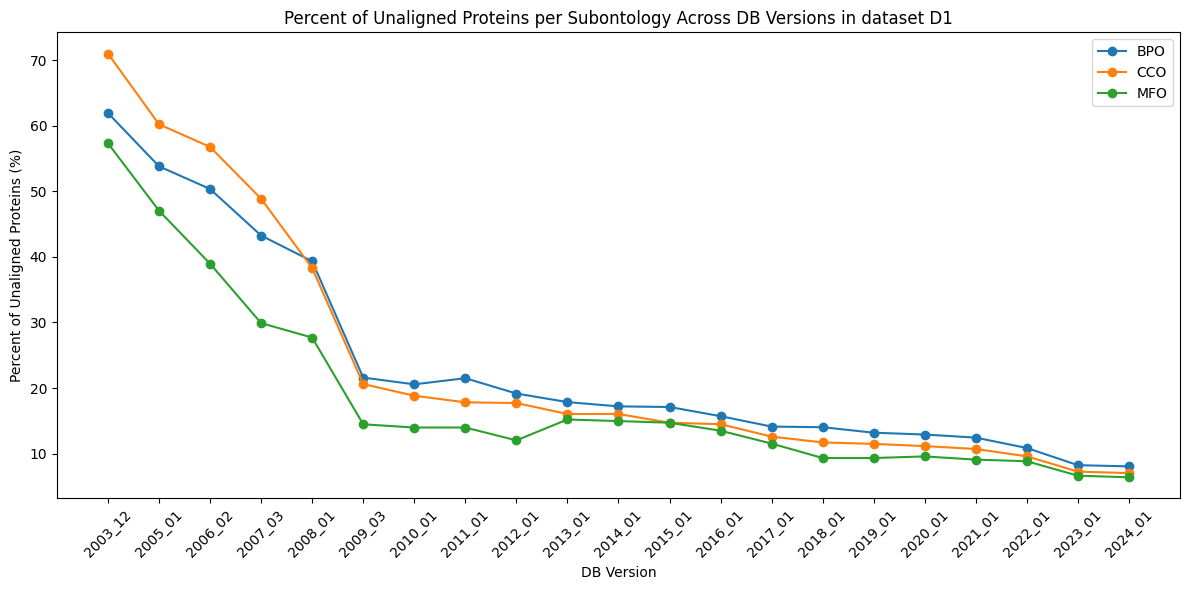

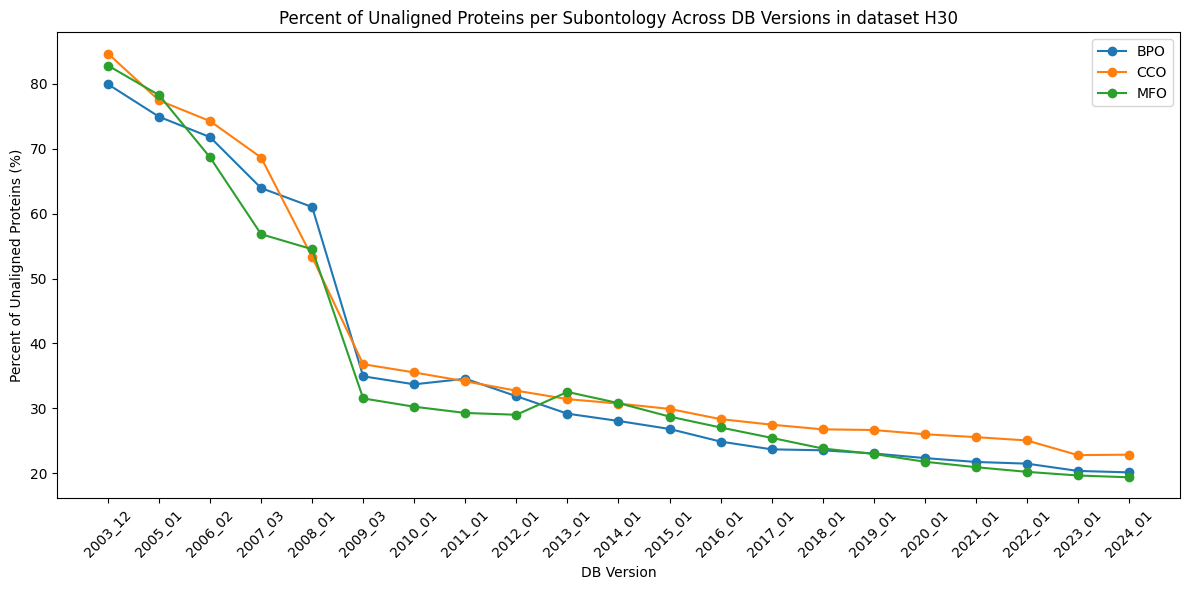

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# List of DB versions (dates)
dates = [
    '2024_01', '2023_01', '2022_01', '2021_01', '2020_01', '2019_01', '2018_01',
    '2017_01', '2016_01', '2015_01', '2014_01', '2013_01', '2012_01', '2011_01',
    '2010_01', '2009_03', '2008_01', '2007_03', '2006_02', '2005_01', '2003_12'
]
dates.reverse()
subontologies = ['BPO', 'CCO', 'MFO']

base_folder = '/home/atoffano/PFP_baselines'

for dset  in ['D1', 'H30']:
    # Get total number of proteins per subontology
    total_proteins = {}
    for subont in subontologies:
        anno_file = os.path.join(base_folder, f'{dset}_test_annotations/{dset}_{subont}_test.tsv')
        if os.path.exists(anno_file):
            df = pd.read_csv(anno_file, sep='\t')
            total_proteins[subont] = df['target_ID'].nunique()
        else:
            total_proteins[subont] = 1  # avoid division by zero

    # percent_unaligned[date][subont] = percent
    percent_unaligned = {date: {} for date in dates}

    for date in dates:
        for subont in subontologies:
            file_path = os.path.join(
                base_folder,
                f"{date}/baselines_{dset}_{date}_{subont}/unaligned_proteins_{dset}_{date}_{subont}.txt"
            )
            if os.path.exists(file_path):
                with open(file_path) as f:
                    proteins = {line.strip() for line in f if line.strip()}
                percent = 100 * len(proteins) / total_proteins[subont] if total_proteins[subont] else 0
            else:
                percent = 0
            percent_unaligned[date][subont] = percent

    # Build DataFrame: rows=db version, columns=subontology, values=percent
    df = pd.DataFrame(percent_unaligned).T[subontologies]

    # Plot
    plt.figure(figsize=(12, 6))
    for subont in subontologies:
        plt.plot(df.index, df[subont], marker='o', label=subont)
    plt.xlabel('DB Version')
    plt.ylabel('Percent of Unaligned Proteins (%)')
    plt.title('Percent of Unaligned Proteins per Subontology Across DB Versions in dataset ' + dset)
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

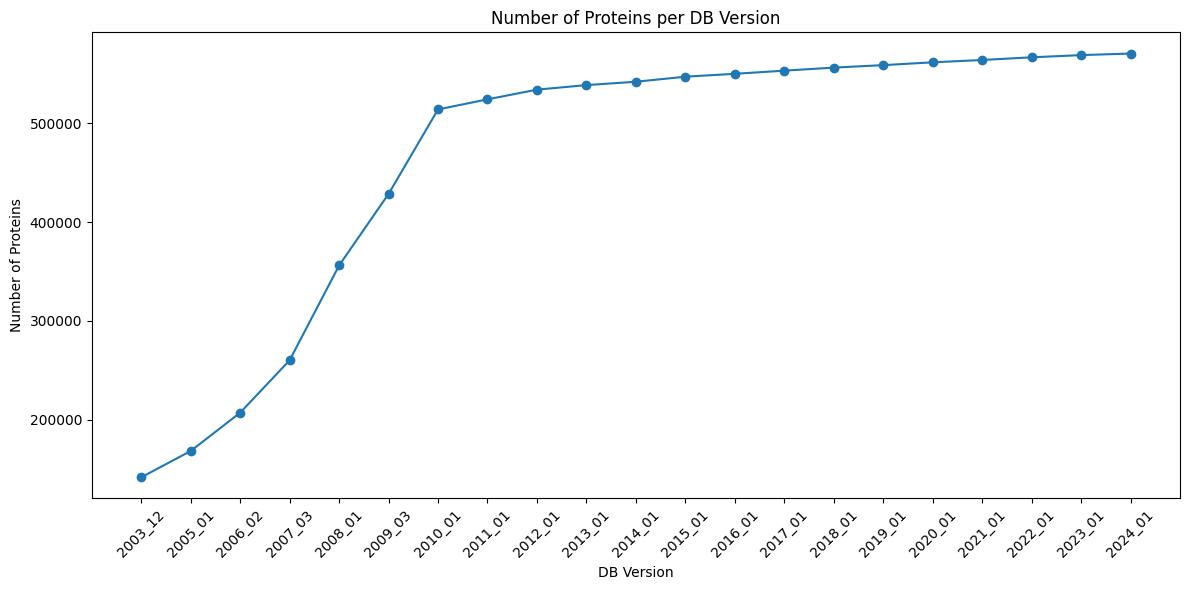

In [1]:
import os
import pandas as pd

import matplotlib.pyplot as plt

# List of DB versions (dates)
dates = [
    '2024_01', '2023_01', '2022_01', '2021_01', '2020_01', '2019_01', '2018_01',
    '2017_01', '2016_01', '2015_01', '2014_01', '2013_01', '2012_01', '2011_01',
    '2010_01', '2009_03', '2008_01', '2007_03', '2006_02', '2005_01', '2003_12'
]
dates.reverse()
base_folder = '/home/atoffano/PFP_baselines'

protein_counts = []
for date in dates:
    anno_file = os.path.join(base_folder, f"{date}/swissprot_{date}_annotations.tsv")
    if os.path.exists(anno_file):
        df = pd.read_csv(anno_file, sep='\t')
        n_proteins = df['EntryID'].nunique()
    else:
        n_proteins = 0
    protein_counts.append(n_proteins)

plt.figure(figsize=(12, 6))
plt.plot(dates, protein_counts, marker='o')
plt.xlabel('DB Version')
plt.ylabel('Number of Proteins')
plt.title('Number of Proteins per DB Version')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import umap

import matplotlib.pyplot as plt

# Load protein sets for selection
bpo = pd.read_csv('/home/atoffano/PFP_baselines/D1_test_annotations/D1_BPO_test.tsv', sep='\t')
cco = pd.read_csv('/home/atoffano/PFP_baselines/D1_test_annotations/D1_CCO_test.tsv', sep='\t')
mfo = pd.read_csv('/home/atoffano/PFP_baselines/D1_test_annotations/D1_MFO_test.tsv', sep='\t')
selected_proteins = set(bpo).union(set(cco)).union(set(mfo))

# Load unaligned protein sets for coloring
unaligned_bpo = set(pd.read_csv('/home/atoffano/PFP_baselines/2003_12/baselines_D1_2003_12_BPO/unaligned_proteins_D1_2003_12_BPO.txt', header=None)[0])
unaligned_cco = set(pd.read_csv('/home/atoffano/PFP_baselines/2003_12/baselines_D1_2003_12_CCO/unaligned_proteins_D1_2003_12_CCO.txt', header=None)[0])
unaligned_mfo = set(pd.read_csv('/home/atoffano/PFP_baselines/2003_12/baselines_D1_2003_12_MFO/unaligned_proteins_D1_2003_12_MFO.txt', header=None)[0])
unaligned_proteins = unaligned_bpo.union(unaligned_cco).union(unaligned_mfo)

# Load embeddings and filter
emb_df = pd.read_csv('/home/atoffano/these-antoine/data/BeProf/beprof_esmc_600M_emb.csv')
emb_df = emb_df[emb_df['protein'].isin(selected_proteins)].reset_index(drop=True)

# Assign label for coloring
emb_df['Alignment'] = emb_df['protein'].apply(lambda x: 'Unaligned' if x in unaligned_proteins else 'Aligned')
colors = {'Unaligned': 'blue', 'Aligned': 'red'}

# UMAP embedding
embedding_cols = [col for col in emb_df.columns if col not in ['protein', 'Alignment']]
umap_emb = umap.UMAP(random_state=42).fit_transform(emb_df[embedding_cols])

# Plot
plt.figure(figsize=(8, 6))
for label, color in colors.items():
    idx = emb_df['Alignment'] == label
    plt.scatter(umap_emb[idx, 0], umap_emb[idx, 1], c=color, label=label, alpha=0.6, s=10)
plt.xlabel('UMAP-1')
plt.ylabel('UMAP-2')
plt.legend()
plt.title('UMAP of Protein Embeddings')
plt.tight_layout()
plt.show()